In [1]:
from tensorflow.keras import  datasets
from keras.layers import Input, Dense, Flatten
from keras.models import Sequential
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [4]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# #reshape data from 3-D to 2-D array
# x_train = x_train.reshape(60000, 784)
# x_test = x_test.reshape(10000, 784)

In [6]:
model=Sequential() #Create a network sequence.
# model.add(Input(shape=(28,28,1)))
# model.add(Flatten())
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(120,activation = 'tanh'))
model.add(Dense(84,activation = 'tanh'))
model.add(Dense(10,activation = 'softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                                 
Total params: 105,214
Trainable params: 105,214
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
#model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.3386 - accuracy: 0.9041 - val_loss: 0.1966 - val_accuracy: 0.9455
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1586 - accuracy: 0.9534 - val_loss: 0.1332 - val_accuracy: 0.9594
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1092 - accuracy: 0.9674 - val_loss: 0.1023 - val_accuracy: 0.9683
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0826 - accuracy: 0.9756 - val_loss: 0.0921 - val_accuracy: 0.9719
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0649 - accuracy: 0.9805 - val_loss: 0.0939 - val_accuracy: 0.9710
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0498 - accuracy: 0.9853 - val_loss: 0.0834 - val_accuracy: 0.9738
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0408 - accuracy: 0.9879 - val_loss: 0.0768 - val_accuracy: 0.9758
Epoch 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                                 
Total params: 105,214
Trainable params: 105,214
Non-trainable params: 0
_________________________________________________________________


In [11]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/SavedModels/mnist_new.h5')
from keras.models import load_model
model1=load_model('/content/drive/MyDrive/SavedModels/mnist_new.h5')

Mounted at /content/drive


In [12]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0760 - accuracy: 0.9777


In [13]:
score = model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9777


In [14]:
y_pred=model1.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [15]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

In [16]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(y_test,y_pred1))

accuracy_score(y_test,y_pred1)*100

[[ 967    0    1    1    0    1    5    1    3    1]
 [   0 1125    4    0    0    1    1    2    2    0]
 [   1    0 1019    2    1    0    2    3    4    0]
 [   0    1   13  983    0    3    0    4    6    0]
 [   0    0    5    1  960    0    2    1    2   11]
 [   1    0    0    9    2  869    3    1    4    3]
 [   3    3    4    1    4    7  932    0    4    0]
 [   0    4   14    0    1    0    0 1002    2    5]
 [   3    1    9    6    3    4    0    3  943    2]
 [   0    3    2    7    8    1    0    5    6  977]]


97.77

[5.9155183e-09 4.0797872e-09 3.6817229e-07 3.0449044e-06 3.1062392e-08
 7.7693346e-10 7.6228298e-13 9.9999583e-01 4.6218258e-08 7.2043127e-07]
7


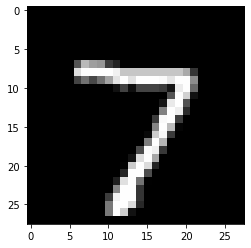

In [17]:
plt.imshow(x_test[0],cmap="gray")
print(y_pred[0])
print(y_pred1[0])

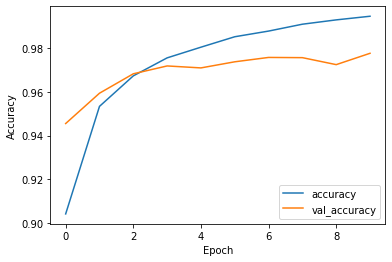

In [18]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')